Laura Michel Bolivar Rincon 

##Importamos Librerias

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 

##Cargamos la Bd 

In [223]:
data = pd.DataFrame()
data = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv', encoding='utf-8')

##Conocemos la Bd

In [224]:
data.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


##Convertimos cada categoria a data *numerica*

In [225]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()

In [226]:
data['trabajo']=le.fit_transform(data['trabajo'])  
data['estado_civil ']=le.fit_transform(data['estado_civil '])   
data['credito_sin_pago']=le.fit_transform(data['credito_sin_pago'])  
data['prestamo_vivienda']=le.fit_transform(data['prestamo_vivienda']) 
data['prestamo_personal']=le.fit_transform(data['prestamo_personal'])  
data['contacto']=le.fit_transform(data['contacto']) 


In [227]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
data['educacion'] = data['educacion'].map(educacion)

In [228]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11
}
data['mes'] = data['mes'].map(mes)

In [229]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

###Verificamos la conversion de los datos

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      41188 non-null  int64  
 1   trabajo                   41188 non-null  int64  
 2   estado_civil              41188 non-null  int64  
 3   educacion                 41188 non-null  int64  
 4   total_hijos               41188 non-null  int64  
 5   credito_sin_pago          41188 non-null  int64  
 6   prestamo_vivienda         41188 non-null  int64  
 7   prestamo_personal         41188 non-null  int64  
 8   valor_prestamo            41188 non-null  int64  
 9   dias_ultimo_pago          41188 non-null  int64  
 10  tarjetas_credito          41188 non-null  int64  
 11  contacto                  41188 non-null  int64  
 12  mes                       41006 non-null  float64
 13  dia_semana                41188 non-null  int64  
 14  duraci

####Mes estan aun con tipo FLOAT lo convertimos a entero

In [231]:
data= data.fillna(0)

In [232]:
data['mes']= data['mes'].astype('int')

#Arbol  de Desicion

##Dividimos el conjunto de datos 

In [233]:
dat_p=data.drop('si_no', axis=1)
X = dat_p
y = data.si_no
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56)

####Instanciar arbol de desicion 


In [234]:
arbol_clasi=DecisionTreeClassifier(max_depth=3, random_state=0)

####Entrenamos el modelo 

In [235]:
arbol_clasi.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

###Utilizamos los datos para predecir 

In [236]:
print(X_test.iloc[0])
print(y_test.iloc[0])
arbol_clasi.predict(X_test.iloc[0].values.reshape(1,-1))
arbol_clasi.predict(X_test[0:10])

edad                         40
trabajo                       9
estado_civil                  1
educacion                     6
total_hijos                   5
credito_sin_pago              0
prestamo_vivienda             0
prestamo_personal             0
valor_prestamo                0
dias_ultimo_pago              0
tarjetas_credito              1
contacto                      1
mes                           6
dia_semana                    2
duracion_ultimo_contacto    119
dias_ultimo_contacto          0
anterior_contacto             0
numero_empleados            749
Name: 25900, dtype: int64
0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

####Presicion(accuary) del alogritmo

In [237]:
accuary=arbol_clasi.score(X_test,y_test)
print(accuary)

0.8976400893464116


In [238]:
data.columns

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')

##Graficando el Arbol

In [239]:
class_names_list=list(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data =export_graphviz(arbol_clasi,feature_names=dat_p.columns, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('mark_data_todo.png')

True

##Conociendo las caracteristicas mas importantes

In [240]:
importances= pd.DataFrame({'feature':X_train.columns, 'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
14,duracion_ultimo_contacto,0.709
16,anterior_contacto,0.158
12,mes,0.101
11,contacto,0.032
0,edad,0.000
1,trabajo,0.000
15,dias_ultimo_contacto,0.000
13,dia_semana,0.000
10,tarjetas_credito,0.000
9,dias_ultimo_pago,0.000


In [241]:
max_depth_lista=list(range(1,15))
accuracy=[]
for depth in max_depth_lista:
    #creamos la instancia del arbol
  arbol_clasi= DecisionTreeClassifier(max_depth=depth, random_state=0)
  #Entrenamos on la informacion 
  arbol_clasi.fit(X_train,y_train)
  #Obtenemos el score
  score=arbol_clasi.score(X_test,y_test)
  accuracy.append(score)

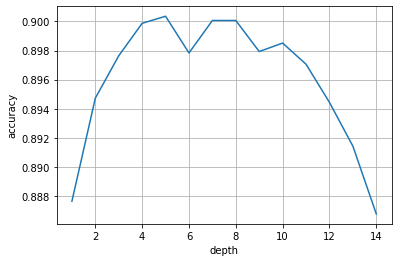

In [242]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

#Parte2

In [243]:
filter_data = {"duracion_ultimo_contacto":data["duracion_ultimo_contacto"],"anterior_contacto":data["anterior_contacto"],"credito_sin_pago":data['credito_sin_pago'],"si_no":data["si_no"]}
filter_dataset = pd.DataFrame(data=filter_data)
print(filter_dataset) 

       duracion_ultimo_contacto  anterior_contacto  credito_sin_pago  si_no
0                           210                  0                 1      0
1                           138                  0                 0      0
2                           339                  2                 0      1
3                           185                  0                 0      0
4                           137                  1                 0      1
...                         ...                ...               ...    ...
41183                       222                  0                 1      0
41184                       196                  0                 1      0
41185                        62                  0                 2      0
41186                       200                  0                 2      0
41187                       112                  0                 0      0

[41188 rows x 4 columns]


In [244]:
filter_dataset.columns

Index(['duracion_ultimo_contacto', 'anterior_contacto', 'credito_sin_pago',
       'si_no'],
      dtype='object')

In [245]:
dat=filter_dataset.drop('si_no', axis=1)
X = dat
y = filter_dataset.si_no
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [246]:
arbol_clasi=DecisionTreeClassifier(max_depth=5, random_state=7)

In [247]:
arbol_clasi.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [248]:
print(X_test.iloc[0])
print(y_test.iloc[0])
arbol_clasi.predict(X_test.iloc[0].values.reshape(1,-1))
arbol_clasi.predict(X_test[0:10])

duracion_ultimo_contacto    244
anterior_contacto             0
credito_sin_pago              0
Name: 32884, dtype: int64
0


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [249]:
accuary=arbol_clasi.score(X_test,y_test)
print(accuary)

0.8920073807905216


##Graficando Arbol

In [105]:
class_names_list=list(['duracion_ultimo_contacto','anterior_contacto','credito_sin_pago'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data =export_graphviz(arbol_clasi,feature_names=dat.columns, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('mark_data2.png')

True

###Caracteristicas mas importantes 

In [250]:
importances= pd.DataFrame({'feature':X_train.columns, 'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
0,duracion_ultimo_contacto,0.749
1,anterior_contacto,0.221
2,credito_sin_pago,0.030


In [253]:
max_depth_lista=list(range(1,15))
accuracy=[]
for depth in max_depth_lista:
    #creamos la instancia del arbol
  arbol_clasi= DecisionTreeClassifier(max_depth=depth, random_state=0)
  #Entrenamos on la informacion 
  arbol_clasi.fit(X_train,y_train)
  #Obtenemos el score
  score=arbol_clasi.score(X_test,y_test)
  accuracy.append(score)

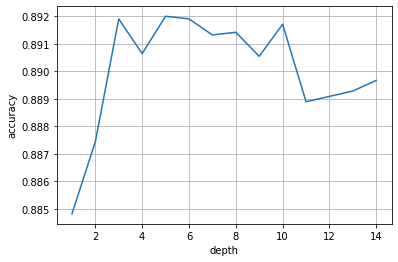

In [254]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()